In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from typing import List ,Tuple , Dict , DefaultDict , Any

seed: int = 42
random.seed(seed)
np.random.seed(seed)

%matplotlib inline

print("Libraries imported and seeds set.")


Libraries imported and seeds set.


In [3]:
class GridEnvironmentSimple:

    def __init__(self, rows: int = 10, cols: int = 10) -> None:
        self.rows: int = rows
        self.cols: int = cols

        self.start_state: Tuple[int, int] = (0, 0)
        self.goal_state: Tuple[int, int] = (rows - 1, cols - 1)
        self.state: Tuple[int, int] = self.start_state

        self.action_map: Dict[int, Tuple[int, int]] = {
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1),   # right
        }

        self.actions: List[int] = list(self.action_map.keys())
        self.action_dim: int = len(self.actions)
        print(f"[Env] Initialized {rows}x{cols} grid. Start: {self.start_state}, Goal: {self.goal_state}")

    def reset(self) -> Tuple[int, int]:
        self.state = self.start_state
        return self.state

    def step(self, action: int) -> Tuple[Tuple[int, int], float, bool]:
        if self.state == self.goal_state:
            return self.state, 0.0, True

        dr, dc = self.action_map[action]
        current_row, current_col = self.state
        next_row, next_col = current_row + dr, current_col + dc

        reward: float = -0.1
        if not (0 <= next_row < self.rows and 0 <= next_col < self.cols):
            next_state_tuple = self.state
            reward = -1.0
        else:
            self.state = (next_row, next_col)
            next_state_tuple = self.state
            if self.state == self.goal_state:
                reward = 10.0

        done: bool = (self.state == self.goal_state)
        return next_state_tuple, reward, done

    def get_action_space_size(self) -> int:
        return self.action_dim


In [4]:
simple_env: GridEnvironmentSimple = GridEnvironmentSimple(rows=10, cols=10)
n_actions_simple: int = simple_env.get_action_space_size()

[Env] Initialized 10x10 grid. Start: (0, 0), Goal: (9, 9)


In [5]:
agent_memory: DefaultDict[Tuple[int , int], DefaultDict[int , list[float]]] = \
  defaultdict(lambda : defaultdict(list))

print("Agent memory initialized.")
print(f"Example memory access for unvisited state (0,1), action 0: {agent_memory[(0,1)][0]}")

Agent memory initialized.
Example memory access for unvisited state (0,1), action 0: []


In [6]:
def choose_simple_action(
    state: Tuple[int, int],
    memory: DefaultDict[Tuple[int, int], DefaultDict[int, List[float]]],
    epsilon: float,
    n_actions: int
) -> int:

    if random.random() < epsilon:
        return random.randrange(n_actions)

    state_action_memory = memory[state]
    avg_rewards_for_actions: List[float] = []

    for a in range(n_actions):
        rewards_list = state_action_memory[a]
        if not rewards_list:
            avg_reward = 0.0
        else:
            avg_reward = np.mean(rewards_list)
        avg_rewards_for_actions.append(avg_reward)

    if not avg_rewards_for_actions:
        return random.randrange(n_actions)

    max_avg_reward = max(avg_rewards_for_actions)
    best_actions = [a for a, avg_r in enumerate(avg_rewards_for_actions) if avg_r == max_avg_reward]
    action = random.choice(best_actions)
    return action

In [7]:
def update_simple_memory(
    memory: DefaultDict[Tuple[int, int], DefaultDict[int, List[float]]],
    state: Tuple[int, int],
    action: int,
    reward: float
) -> None:

  memory[state][action].append(reward)


In [8]:
NUM_EPISODES: int = 1000
MAX_STEPS_PER_EPISODE: int = 150
EPSILON_START_SIM: float = 1.0
EPSILON_END_SIM: float = 0.01
EPSILON_DECAY_SIM: float = 0.99
PRINT_EVERY_N_EPISODES: int = 100

In [9]:
env_run: GridEnvironmentSimple = GridEnvironmentSimple(rows=10, cols=10) # Creates a 10x10 grid world environment.
n_actions_run: int = env_run.get_action_space_size() #4

agent_memory_run: DefaultDict[Tuple[int , int] , DefaultDict[int , list[float]]] = \
  defaultdict(lambda:  defaultdict(list))

simple_episode_rewards: List[float] = []
simple_episode_lengths: List[int] = []
simple_episode_epsilons: List[float] = []

current_epsilon_run: float = EPSILON_START_SIM
print("Simulation setup complete.")

[Env] Initialized 10x10 grid. Start: (0, 0), Goal: (9, 9)
Simulation setup complete.


In [10]:
print(f"Starting Simple Agent Simulation for {NUM_EPISODES} episodes...")

for i_episode in range(1, NUM_EPISODES + 1):
    current_state: Tuple[int, int] = env_run.reset()
    current_episode_reward: float = 0.0

    for t in range(MAX_STEPS_PER_EPISODE):
        action: int = choose_simple_action(
            current_state,
            agent_memory_run,
            current_epsilon_run,
            n_actions_run
        )

        next_state, reward, done = env_run.step(action)
        update_simple_memory(agent_memory_run, current_state, action, reward)

        current_state = next_state
        current_episode_reward += reward

        if done:
            break

    simple_episode_rewards.append(current_episode_reward)
    simple_episode_lengths.append(t + 1)
    simple_episode_epsilons.append(current_epsilon_run)

    current_epsilon_run = max(EPSILON_END_SIM, current_epsilon_run * EPSILON_DECAY_SIM)

    if i_episode % PRINT_EVERY_N_EPISODES == 0:
        avg_reward = np.mean(simple_episode_rewards[-PRINT_EVERY_N_EPISODES:])
        avg_length = np.mean(simple_episode_lengths[-PRINT_EVERY_N_EPISODES:])
        print(f"Episode {i_episode}/{NUM_EPISODES} | Avg Reward (last {PRINT_EVERY_N_EPISODES}): {avg_reward:.2f} | Avg Length: {avg_length:.1f} | Epsilon: {current_epsilon_run:.3f}")

print(f"\nSimple Agent Simulation Finished after {NUM_EPISODES} episodes.")


Starting Simple Agent Simulation for 1000 episodes...
Episode 100/1000 | Avg Reward (last 100): -20.71 | Avg Length: 144.0 | Epsilon: 0.366
Episode 200/1000 | Avg Reward (last 100): -17.11 | Avg Length: 148.6 | Epsilon: 0.134
Episode 300/1000 | Avg Reward (last 100): -14.65 | Avg Length: 144.3 | Epsilon: 0.049
Episode 400/1000 | Avg Reward (last 100): -15.26 | Avg Length: 149.7 | Epsilon: 0.018
Episode 500/1000 | Avg Reward (last 100): -15.07 | Avg Length: 149.7 | Epsilon: 0.010
Episode 600/1000 | Avg Reward (last 100): -11.95 | Avg Length: 136.8 | Epsilon: 0.010
Episode 700/1000 | Avg Reward (last 100): -10.14 | Avg Length: 127.4 | Epsilon: 0.010
Episode 800/1000 | Avg Reward (last 100): -11.02 | Avg Length: 133.2 | Epsilon: 0.010
Episode 900/1000 | Avg Reward (last 100): -13.35 | Avg Length: 141.3 | Epsilon: 0.010
Episode 1000/1000 | Avg Reward (last 100): -7.49 | Avg Length: 110.5 | Epsilon: 0.010

Simple Agent Simulation Finished after 1000 episodes.


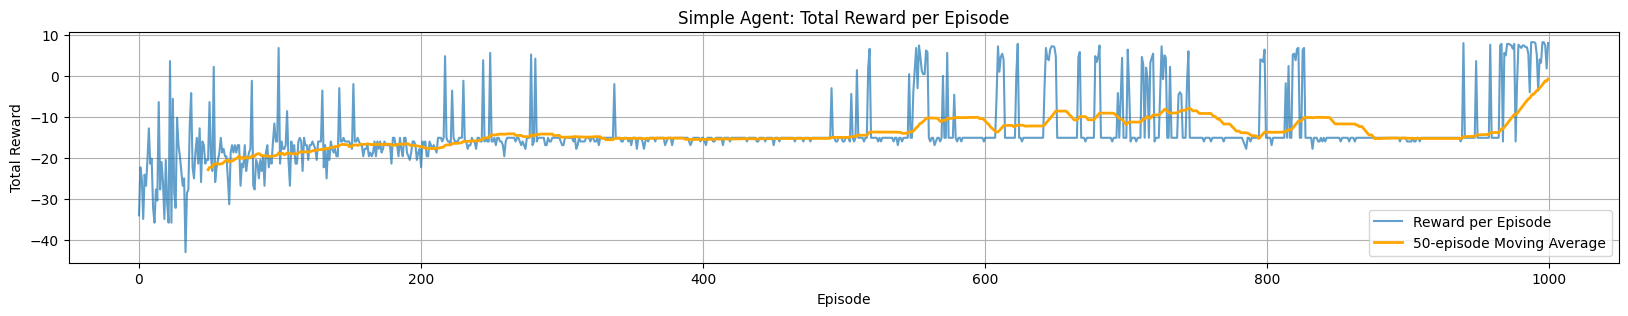

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(simple_episode_rewards, label='Reward per Episode', alpha=0.7)
plt.title('Simple Agent: Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)

# Calculate and plot moving average
window_size = 50
if len(simple_episode_rewards) >= window_size:
    rewards_ma = np.convolve(simple_episode_rewards, np.ones(window_size)/window_size, mode='valid')
    plt.plot(np.arange(len(rewards_ma)) + window_size - 1, rewards_ma,
             label=f'{window_size}-episode Moving Average', color='orange', linewidth=2)

plt.legend()
plt.show()

Calculating average rewards and best actions for visualization...


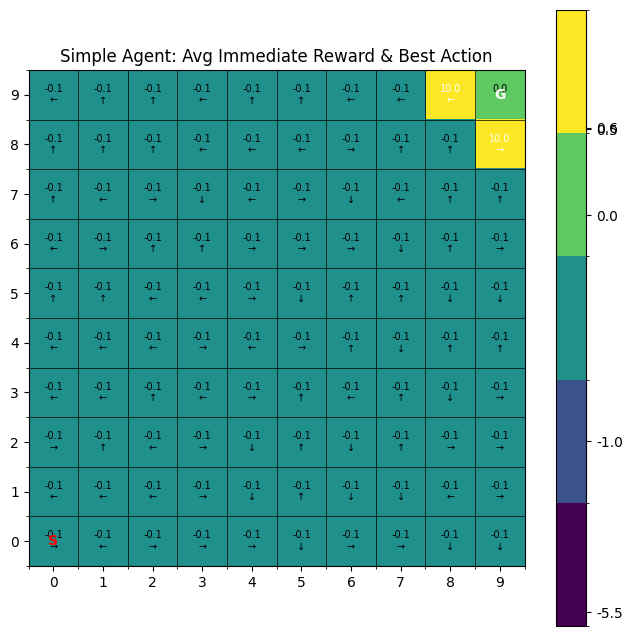

In [12]:
def plot_average_rewards_with_policy(
    memory: DefaultDict[Tuple[int, int], DefaultDict[int, List[float]]],
    env: GridEnvironmentSimple
) -> None:
    """ Plots the average immediate reward for the best action and overlays arrows showing best policy. """
    rows = env.rows
    cols = env.cols
    avg_reward_grid = np.full((rows, cols), -np.inf)
    best_action_grid = np.full((rows, cols), -1)  # Store best action per state

    print("Calculating average rewards and best actions for visualization...")
    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state == env.goal_state:
                avg_reward_grid[r, c] = env.step(0)[1]
                best_action_grid[r, c] = -1
                continue

            action_values = []
            state_memory = memory[state]
            has_experience = False
            for a in range(env.get_action_space_size()):
                rewards = state_memory[a]
                if rewards:
                    has_experience = True
                    avg_reward = np.mean(rewards)
                    action_values.append(avg_reward)
                else:
                    action_values.append(-np.inf)

            if not has_experience:
                avg_reward_grid[r, c] = -5
                best_action_grid[r, c] = -1
            else:
                best_avg_reward = max(action_values)
                avg_reward_grid[r, c] = best_avg_reward
                best_action_grid[r, c] = np.argmax(action_values)

    from matplotlib.colors import BoundaryNorm, ListedColormap
    cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 5)))
    bounds = [-6, -1.5, -0.5, -0.05, 0.1, 11]
    norm = BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(cols * 0.8, rows * 0.8))
    im = ax.imshow(avg_reward_grid, cmap=cmap, norm=norm, origin='lower')

    # Define arrow markers for actions
    arrow_dict = {
        0: '↑',  # UP
        1: '→',  # RIGHT
        2: '↓',  # DOWN
        3: '←'   # LEFT
    }

    # Add text annotations: reward + best action
    for r in range(rows):
        for c in range(cols):
            val = avg_reward_grid[r, c]
            best_a = best_action_grid[r, c]
            if val == -5:
                color = "grey"
                text = "N/A"
            else:
                color = "white" if abs(val) > 1 else "black"
                arrow = arrow_dict.get(best_a, "")
                text = f"{val:.1f}\n{arrow}"

            ax.text(c, r, text, ha="center", va="center", color=color, fontsize=7)

    # Start and Goal
    start_r, start_c = env.start_state
    goal_r, goal_c = env.goal_state
    ax.text(start_c, start_r, 'S', ha='center', va='center', color='red', weight='bold')
    ax.text(goal_c, goal_r, 'G', ha='center', va='center', color='white', weight='bold')

    ax.set_xticks(np.arange(cols))
    ax.set_yticks(np.arange(rows))
    ax.set_xticklabels(np.arange(cols))
    ax.set_yticklabels(np.arange(rows))
    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.set_title("Simple Agent: Avg Immediate Reward & Best Action")

    ticks = [b + 0.5 for b in bounds[:-1]]
    fig.colorbar(im, ticks=ticks, format="%.1f")
    plt.show()

# Call the new version
plot_average_rewards_with_policy(agent_memory_run, env_run)
